In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [3]:
with open("C:/data/filelist.txt") as f: 
    content = f.readlines()
fileList = [x.strip() for x in content]

In [4]:
"""titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility	delta','gamma','theta','vega','rho']"""

"titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility\tdelta','gamma','theta','vega','rho']"

In [15]:
#this is an array of titles that corresponds to the order in the csv files 
#for example tiles[3] returns a string root 
#this makes the code much more readable 
titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility	delta','gamma','theta','vega','rho']
i  = 0 
csvD = {} #csvDictionary give it a column name and it returns its index 
optionD = {} #this is dictionary of all of the different options. Give a hash function, get an option time series 
for i in range(0, len(titles)): 
    csvD[titles[i]] = i 
j = 0 
with open('C:/data/UnderlyingOptionsIntervalsCalcs_60sec_2009-03-02.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        if (j ==0):  #skips the first header line 
            j = 1 
            continue 
        hashValue =  row[csvD['root']]  + '|' +row[csvD['expiration']]+ '|'+row[csvD['strike']]+'|'+row[csvD['option_type']]
        row[csvD['quote_datetime']] = datetime.strptime(row[csvD['quote_datetime']] ,'%Y-%m-%d %H:%M:%S') #these should be changed to datetime64 
        row[csvD['expiration']] = datetime.strptime(row[csvD['expiration']] +' 16:00:00','%Y-%m-%d %H:%M:%S') #assumes 4:00 est close
        for i in range(csvD['strike'],csvD['rho']+1): #turns all of the float rows into floats 
            if i != csvD['option_type']: #avoids the option time column when trying to float convert 
                row[i] = float(row[i])
      
        if not hashValue in optionD: #if the hashValue isn't in option D ...
            dic = {}  #make a new dictionary 
            for title in titles:  #go through the titles array 
                dic[title] = [row[csvD[title]]] #make a dictionary where the key is the title and the value is a list 
                                                #where the first enitry is the value in the row under that tile 
            optionD[hashValue] = dic #store the reference to the new dictionary in the optionD dictionary 
        else:
            dic = optionD[hashValue] #dictionary already exists, so get its reference 
            for title in titles: 
                dic[title].append(row[csvD[title]]) #append the rows to the list 
            #stack = optionD[hashValue] 
            #stack.append(row)
        

In [18]:
optionPD = {} #creates a new dictionary of all of the options as a Pandas Dataframe 
for key in optionD: 
    optionPD[key] = pd.DataFrame(optionD[key]) #turns the dictionaries into a pandas dataframe 

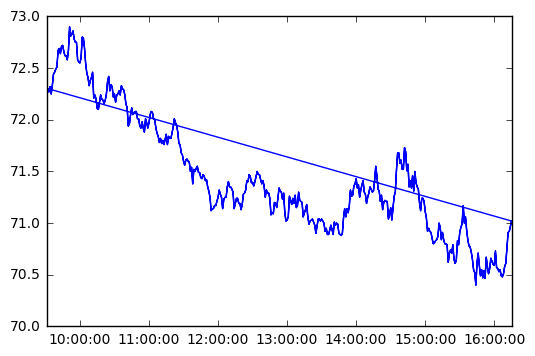

In [8]:

firstLine = True 
for fileName in fileList:
    fullFileName = "C:/data/"+fileName.rstrip() #might only work on windows 
    if(firstLine):
        data = pd.read_csv(fullFileName,sep=',')
        firstLine = False 
    else: 
        newData = pd.read_csv(fullFileName,sep=',')
        data.append(newData)

#newData = open(temp,"rb")
#data = pd.read_csv(csvFileName,sep=',')
data['hash'] = data['underlying_symbol'] + '|' +data['expiration']+'|'+data['strike'].astype(str)+'|'+data['option_type']
#data[['underlying_symbol','root','option_type']].astype(basestring)
data['quote_datetime']= pd.to_datetime(data['quote_datetime'])
data['expiration'] = pd.to_datetime(data['expiration'],format='%Y-%m-%d')
%matplotlib inline
plt.plot(data['quote_datetime'][(data['hash']==data['hash'].get(1))],data['active_underlying_price'][(data['hash']==data['hash'].get(1))])

In [9]:
with open("C:/data/filelist.txt") as f: 
    allWords = f.readlines() 
content = [x.strip() for x in allWords]
print content 

['UnderlyingOptionsIntervalsCalcs_60sec_2009-03-02.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-03.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-04.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-05.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-06.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-09.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-10.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-11.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-12.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-13.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-16.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-17.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-18.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-19.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-20.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-23.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-24.csv', 'UnderlyingOptionsIntervalsCalcs_60sec_2009-03-

### puts options into a hash function 

In [10]:
optionD = {} 
for index, row in data.iterrows(): 
    if not row['hash'] in optionD:
        stack = []
        stack.append(row)
        optionD[row['hash']]=stack        
    else:
        stack = optionD[row['hash']]
        stack.append(row)
        lastRow = row 

In [11]:
otherData = data[data["bid"]>0]
otherData.sort_values(["expiration"],ascending=[True]).head()

,underlying_symbol,quote_datetime,root,expiration,strike,option_type,open,high,low,close,...,underlying_ask,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,hash
1215,SPY,2009-03-02 09:31:00,SFB,2009-03-21,130.0,P,0.0,0.0,0.0,0.0,...,72.31,0.0000,72.305,1.3962,-0.9522,0.0043,-0.0595,0.0165,-6.7094,SPY|2009-03-21|130.0|P
91611,SPY,2009-03-02 10:52:00,SWV,2009-03-21,68.0,C,0.0,0.0,0.0,0.0,...,71.94,71.6738,71.940,0.5239,0.6883,0.0406,-0.0696,0.0580,2.3194,SPY|2009-03-21|68.0|C
91610,SPY,2009-03-02 10:51:00,SWV,2009-03-21,68.0,C,0.0,0.0,0.0,0.0,...,72.01,71.7788,72.010,0.5249,0.6927,0.0402,-0.0706,0.0577,2.3344,SPY|2009-03-21|68.0|C
91609,SPY,2009-03-02 10:50:00,SWV,2009-03-21,68.0,C,0.0,0.0,0.0,0.0,...,72.01,71.7538,72.010,0.5274,0.6908,0.0401,-0.0703,0.0578,2.3274,SPY|2009-03-21|68.0|C
91608,SPY,2009-03-02 10:49:00,SWV,2009-03-21,68.0,C,0.0,0.0,0.0,0.0,...,72.08,71.8238,72.080,0.5276,0.6935,0.0399,-0.0700,0.0577,2.3379,SPY|2009-03-21|68.0|C


In [12]:
print lastRow.flip()

AttributeError: 'Series' object has no attribute 'flip'

In [ ]:
#newFrame = pd.DataFrame(columns=data.columns)
#lastRow["root"] = "SPY"
#newFrame.append(lastRow)
print type(lastRow)

In [ ]:
#[data["bid"]>0]
print data[data["expiration"]=="2009-03-27"]['hash']

In [ ]:
#generate time seris 
def getTimeSeries(pdRowList,yValue):
    time = []
    price = []
    for item in pdRowList:
        time.append(item['quote_datetime'])
        price.append(item[yValue])
    return {'time':time,'y':price} 

In [ ]:
#uses the get Time series function to get the time and plot it versus the datetime 
ts = getTimeSeries(optionD["RQQ|2009-03-31|131.0|P"],'underlying_ask')
t = ts['time']
y = ts['y']
plt.plot(t,y)

In [ ]:
#this just plots a lot of things. It doesn't work that well 
i = 0 
for key in optionD: 
    i = i + 1 
    ts = getTimeSeries(optionD[key],'theta')
    t = ts['time']
    y = ts['y']
    if((i%37==0) and (optionD[key][1]['option_type'] =="C") and (optionD[key][1]['bid']>0)):
        plt.plot(t,y) 